In [21]:
# import dependencies
import yfinance as yf
import pandas as pd
import numpy as np
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,classification_report,confusion_matrix

In [2]:
# Get CVX stock data from Yahoo Finance
cvx = yf.Ticker("CVX")
cvx = cvx.history(start = '2010-01-01', end = '2022-05-06')
cvx.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,47.932735,48.545686,47.908221,48.459873,10173800,0.0,0
2010-01-05,48.557954,48.803135,48.251478,48.803135,10593700,0.0,0
2010-01-06,48.692819,49.036070,48.539581,48.809277,11014600,0.0,0
2010-01-07,48.643785,48.852186,48.404734,48.625397,9626900,0.0,0
2010-01-08,48.496661,48.711193,48.355681,48.711193,5624300,0.0,0


In [3]:
# remove empty columns
cvx=cvx.drop(columns=['Dividends','Stock Splits','Low','High'])

In [4]:
# Find number of trading days and columns
cvx.shape

(3107, 3)

<AxesSubplot:xlabel='Date'>

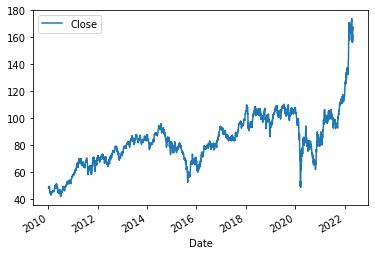

In [5]:
# plot the closing price data
cvx.plot.line(y="Close",use_index=True)

In [6]:
cvx.describe()

,Open,Close,Volume
count,3107.000000,3107.000000,3.107000e+03
mean,83.504838,83.519097,8.199779e+06
std,20.013149,20.064535,4.110008e+06
min,42.341308,42.041500,1.587800e+06
25%,69.984138,69.988300,5.510800e+06
50%,82.544782,82.633171,7.125300e+06
75%,96.238076,96.252941,9.788200e+06
max,173.080002,173.889999,5.723100e+07


In [7]:
cvx.value_counts()

Open        Close       Volume 
42.341308   42.041500   9143600    1
90.594231   90.558601   4944100    1
89.589522   89.860291   6815800    1
89.606301   88.553040   8252900    1
89.645893   89.487511   6167400    1
                                  ..
75.818158   75.832809   8440700    1
75.821825   75.568420   6286100    1
75.830579   75.272659   4647100    1
75.833959   75.323570   7588400    1
173.080002  171.830002  6970200    1
Length: 3107, dtype: int64

In [8]:
# create new target column
cvx['Buy_Sell'] = np.where(cvx['Close'].shift(-1) > cvx['Close'], 1, 0)
cvx.head()

,Open,Close,Volume,Buy_Sell
Date,,,,
2010-01-04,47.932735,48.459873,10173800,1
2010-01-05,48.557954,48.803135,10593700,1
2010-01-06,48.692819,48.809277,11014600,0
2010-01-07,48.643785,48.625397,9626900,1
2010-01-08,48.496661,48.711193,5624300,1


In [9]:
cvx.isnull()

,Open,Close,Volume,Buy_Sell
Date,,,,
2010-01-04,False,False,False,False
2010-01-05,False,False,False,False
2010-01-06,False,False,False,False
2010-01-07,False,False,False,False
2010-01-08,False,False,False,False
...,...,...,...,...
2022-04-29,False,False,False,False
2022-05-02,False,False,False,False
2022-05-03,False,False,False,False


C:\Users\indyh\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\indyh\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\indyh\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


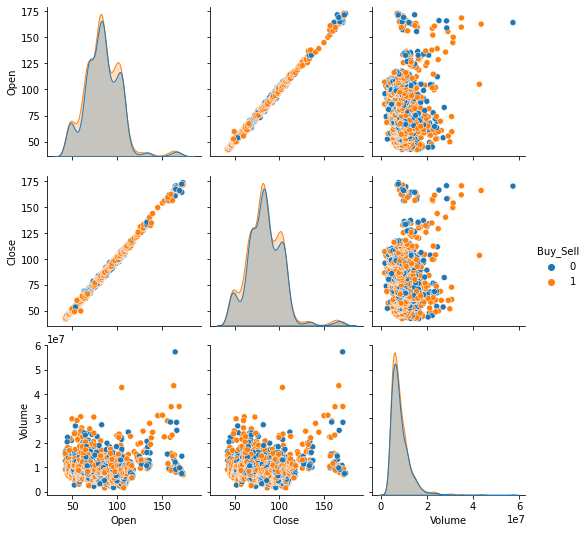

In [10]:
# visulize the data using seaborn pairplots
k= sns.pairplot(cvx, hue='Buy_Sell',diag_kws={'bw': 0.2})

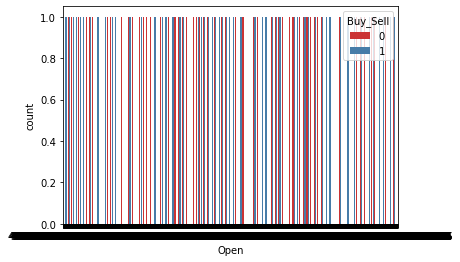

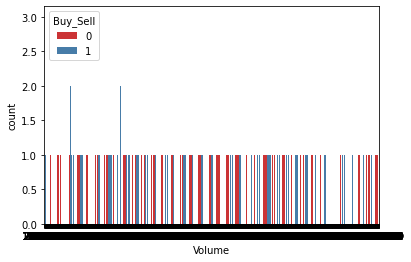

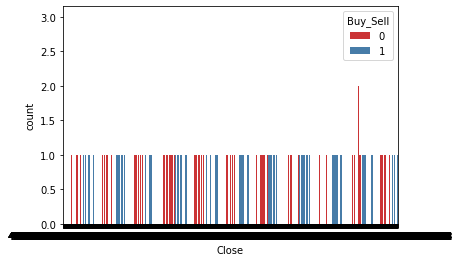

In [11]:
# investigate features by the Buy_Sell column
Features = ['Open','Volume','Close']
for f in Features:
    plt.figure()
    cx = sns.countplot(x=f, data = cvx, hue = 'Buy_Sell', palette= "Set1")

In [12]:

X = cvx[Features].values
y = cvx['Buy_Sell'].values

In [13]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:
# create and train the model(decisiontreeclassifier)
tree = DecisionTreeClassifier().fit(X_train, y_train)

# Show how model performed on test data set
print(tree.score(X_test, y_test))

0.4646302250803859


In [15]:
# show models predicitions
tree_predicitons = tree.predict(X_test)
print(tree_predicitons)

[1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1
 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 

In [16]:
# show actual values
y_test

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,

In [17]:
tree_predicitons = pd.Series(tree_predicitons)
tree_predicitons

0      1
1      0
2      0
3      0
4      0
      ..
617    0
618    0
619    1
620    1
621    1
Length: 622, dtype: int32

In [18]:
# find accuracy scores for training and testing
print("Training Accuracy is: ", tree.score(X_train,y_train))
print("Testing Accuracy is: ",tree.score(X_test,y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.4646302250803859


In [25]:
# create and run random forest classifier
cvx_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
cvx_rf.fit(X_train,y_train)
prediction_test = cvx_rf.predict(X=X_test)

# Accuracy on testing
print("Training Accuracy is: ", cvx_rf.score(X_train,y_train))
# Accuracy on taining
print("Testing Accuracy is: ", cvx_rf.score(X_test,y_test))

# confusion matrix
cvx_cm = confusion_matrix(y_test, prediction_test)
cvx_cm_norm = cvx_cm/cvx_cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plt.cvx_cm_norm, classes=cvx_rf.classes_

Training Accuracy is:  0.9995975855130784
Testing Accuracy is:  0.4758842443729904


<Figure size 432x288 with 0 Axes>